### Here we test many different machine learning models to see how they perform on the regression task of prediciting the MET value from the physiologic signals / extracted features.

In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import train_test_split
import xgboost as xgb
import time
import matplotlib.pyplot as plt

In [2]:
# All subject data included in one .csv file 'pwrtbl_all.csv'
# This data has had outliers removed from sensors and has had smoothing applied
# The person division occur at the following points
# Person A [0:796219] or [:796219]
# Person B [A:1276358]
# Person C [B:1804959]
# Person D [C:2311275]
# Person E [D:2847245]
# Person F [E:3245064]
# Person G [F:3763122]
# Person H [G:4160941]
# Person I [H:4712016]
# Person J [I:5147172] or [I:]

In [3]:
# Load the data
# Loading this 5M line .csv file in with pandas and then converting to numpy is faster than directly loading into numpy with np.genfromtxt()
dataraw = pd.read_csv('pwrtbl_all.csv')
dataraw = dataraw.to_numpy()

In [4]:
# Just splitting the people into separate arrays
divisions = [0, 796219, 1276358, 1804959, 2311275, 2847245, 3245064, 3763122, 4160941, 4712016, 5147172]
data = []
for i in range(0,len(divisions)-1):
    data.append(dataraw[divisions[i]:divisions[i+1],:])

In [5]:
tr = []; ts = []
# Define sets describing who is included in the training and testing sets
fullset = set({0,1,2,3,4,5,6,7,8,9})
trainset = set({0,1,2,3,4,5,6,7})
for i in trainset:
    tr.append(data[i])
# Set difference to find the persons in the test set
for i in fullset - trainset:
    ts.append(data[i])

In [6]:
# Now concatenate the training and testing sets each into a continuous array
tr = np.concatenate(tr, axis = 0)
ts = np.concatenate(ts, axis = 0)

In [7]:
# Break into the X and y arrays for train and test
# Last columns corresponds to the MET value
Xtr = tr[:,:-1]; ytr = tr[:,-1]
Xts = ts[:,:-1]; yts = ts[:,-1]

In [8]:
# Cleaning up all the previous arrays to save memory
del dataraw, data, tr, ts

# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
start = time.time()
mdl = LinearRegression().fit(Xtr,ytr)
pred = mdl.predict(Xts)
end = time.time()
print('RMSE:',np.sqrt(MSE(yts,pred)),'\tMAE:',MAE(yts,pred), '\tTime: ', (end - start))

RMSE: 0.27076282934388285 	MAE: 0.21108765838844162 	Time:  4.978316068649292


# Elastic Net (L1 and L2) Regression

In [11]:
from sklearn.linear_model import ElasticNet

In [12]:
start = time.time()
mdl = ElasticNet(l1_ratio = 1, alpha = 1).fit(Xtr,ytr)
pred = mdl.predict(Xts)
end = time.time()
print('RMSE:',np.sqrt(MSE(yts,pred)),'\tMAE:',MAE(yts,pred), '\tTime: ', (end - start))

RMSE: 0.3005823052717987 	MAE: 0.2700399044620869 	Time:  1.8262457847595215


# Ridge (Tikhonov or L2) Regression

In [13]:
from sklearn.linear_model import Ridge

In [14]:
start = time.time()
mdl = Ridge(alpha = 1, max_iter = 100).fit(Xtr,ytr)
pred = mdl.predict(Xts)
end = time.time()
print('RMSE:',np.sqrt(MSE(yts,pred)),'\tMAE:',MAE(yts,pred), '\tTime: ', (end - start))

RMSE: 0.2707211960179957 	MAE: 0.21106069135481237 	Time:  1.0635299682617188


# K-Neighbors Regression

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
start = time.time()
mdl = KNeighborsRegressor(n_neighbors = 5).fit(Xtr,ytr)
pred = mdl.predict(Xts)
end = time.time()
print('RMSE:',np.sqrt(MSE(yts,pred)),'\tMAE:',MAE(yts,pred), '\tTime: ', (end - start))

RMSE: 0.2589238223359871 	MAE: 0.14862260169737349 	Time:  296.51136112213135


# Decision Tree Regression

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
start = time.time()
mdl = DecisionTreeRegressor(max_depth = 10, random_state = 0).fit(Xtr,ytr)
pred = mdl.predict(Xts)
end = time.time()
print('RMSE:',np.sqrt(MSE(yts,pred)),'\tMAE:',MAE(yts,pred), '\tTime: ', (end - start))

RMSE: 0.1916859223976787 	MAE: 0.07946236813664075 	Time:  1900.8363149166107


# Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
start = time.time()
mdl = RandomForestRegressor(n_estimators = 100, max_depth = 3, bootstrap = True, ).fit(Xtr,ytr)
pred = mdl.predict(Xts)
end = time.time()
print('RMSE:',np.sqrt(MSE(yts,pred)),'\tMAE:',MAE(yts,pred), '\tTime: ', (end - start))

RMSE: 0.22744156791849363 	MAE: 0.15380785351650517 	Time:  2210.08735203743


# XGBoost (Extreme Gradient Boosted Tree Regressor)

In [22]:
import xgboost as xgb

In [23]:
start = time.time()
mdl = xgb.XGBRegressor(learning_rate = 0.03, colsample_bytree = 0.2, max_depth = 3, reg_alpha = 0, reg_lambda = 1, gamma = 0, n_estimators = 100, verbosity = 1).fit(Xtr,ytr)
pred = mdl.predict(Xts)
end = time.time()
print('RMSE:',np.sqrt(MSE(yts,pred)),'\tMAE:',MAE(yts,pred), '\tTime: ', (end - start))

/Users/danemerson/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
RMSE: 0.16844460996675914 	MAE: 0.12928940974138312 	Time:  73.01539611816406


# Neural Network

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [27]:
# Neural Network
mdl = Sequential(
    [
        Dense(10, activation = 'relu'),
        Dense(100, activation = 'relu'),
        Dense(100, activation = 'relu'),
        Dense(1)
    ]
)
start = time.time()
mdl.compile(optimizer = 'Adam', loss = tf.keras.losses.MeanSquaredError())
history = mdl.fit(Xtr,ytr, epochs = 10, validation_split = 0.2)
pred = mdl.predict(Xts)
end = time.time()
print('RMSE:',np.sqrt(MSE(yts,pred)),'\tMAE:',MAE(yts,pred), '\tTime: ', (end - start))

Epoch 1/10
104024/104024 [==============================] - 76s 729us/step - loss: 0.0058 - val_loss: 0.0045
Epoch 2/10
104024/104024 [==============================] - 74s 715us/step - loss: 7.0578e-04 - val_loss: 0.0057
Epoch 3/10
104024/104024 [==============================] - 72s 690us/step - loss: 4.5110e-04 - val_loss: 0.0065
Epoch 4/10
104024/104024 [==============================] - 75s 722us/step - loss: 3.4215e-04 - val_loss: 0.0065
Epoch 5/10
104024/104024 [==============================] - 74s 715us/step - loss: 2.9189e-04 - val_loss: 0.0064
Epoch 6/10
104024/104024 [==============================] - 75s 717us/step - loss: 2.5931e-04 - val_loss: 0.0061
Epoch 7/10
104024/104024 [==============================] - 75s 719us/step - loss: 2.4564e-04 - val_loss: 0.0061
Epoch 8/10
104024/104024 [==============================] - 75s 724us/step - loss: 2.2495e-04 - val_loss: 0.0061
Epoch 9/10
104024/104024 [==============================] - 75s 719us/step - loss: 2.3041e-04 - val_

In [25]:
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size' : 12}
matplotlib.rc('font', **font)

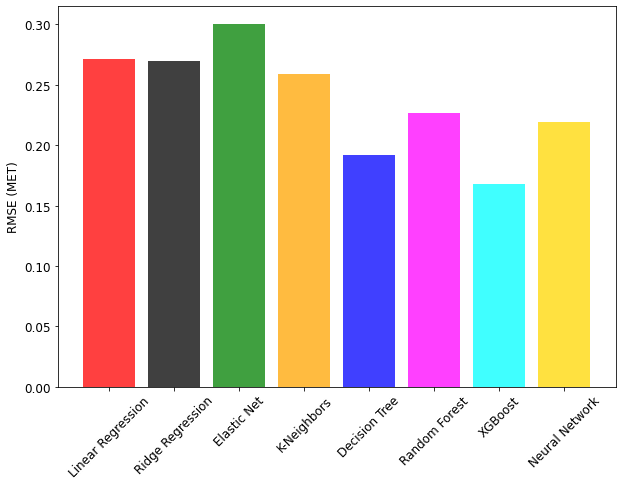

In [26]:
plt.figure(figsize = (10,7))
plt.bar([0,1,2,3,4,5,6,7],[0.271, 0.270, 0.300, 0.259, 0.192, 0.227, 0.168, 0.219], tick_label = ['Linear Regression', 'Ridge Regression', 'Elastic Net', 'K-Neighbors', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network'], color = ['red', 'black', 'green', 'orange', 'blue', 'magenta', 'cyan', 'gold'], alpha = 0.75)
plt.xticks(rotation = 45)
plt.ylabel('RMSE (MET)')
plt.show()